In [1]:
### weighted map generation demo

import cv2
import numpy as np
import math
from matplotlib import pyplot as plt

# semantic RGB
img = cv2.imread('images/test_image2.png')

label_dic = {
    "Road": [128, 64, 128],
    "Sidewalk": [232, 35, 244],
    "Building": [70, 70, 70],
    "Wall": [156, 102, 102],
    "Fence": [153, 153, 190],
    "Pole": [153, 153, 153],
    "Traffic Light": [30, 170, 250],
    "Traffic Sign": [0, 220, 220],
    "Vegetation": [35, 142, 107],
    "Terrain": [152, 251, 152],
    "Sky": [180, 130, 70],
    "Parking": [160, 170, 250],
    "Person": [60, 20, 220],
    "Rider": [0, 0, 255],
    "Car": [142, 0, 0],
    "Truck": [70, 0, 0],
    "Bus": [100, 60, 0],
    "Train": [100, 80, 0],
    "Motorcycle": [230, 0, 0],
    "Bicycle": [32, 11, 119]
}

dist = cv2.DIST_L2

def get_all_distance(img, label_dic, dist):
    # distance map generation
    dist_map = np.zeros([img.shape[0],img.shape[1]])
    
    
    for key_idx in label_dic.keys():
    
        label = np.abs(img - label_dic[key_idx])
        label_one_ch = label[:,:,0] + label[:,:,1] + label[:,:,2]
       
        target_label = label_one_ch == 0
        target_label = target_label.astype(np.uint8)
        dist_transform = cv2.distanceTransform(target_label, cv2.DIST_L2, 5)
       
        dist_map += dist_transform/(np.max(dist_transform)+0.01)
        
        
    return dist_map

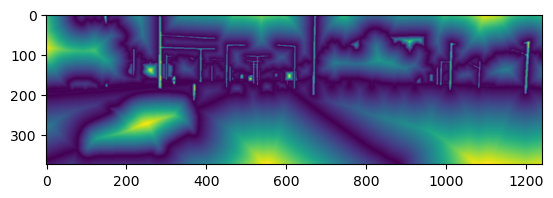

In [2]:
# Viusalizew distance map
dist_map = get_all_distance(img, label_dic, dist)
plt.imshow(dist_map)

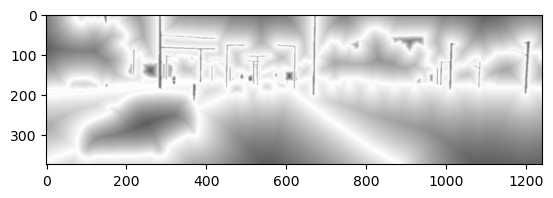

In [14]:
#alpha = 0.01 
alpha = 1 # boundary importance factor a
weight_map = np.exp(-alpha*dist_map)
plt.imshow(weight_map, cmap ='gray', vmin= 0, vmax = 1)
plt.show()

In [16]:
cv2.imwrite("wIoU_demo.png", weight_map*255)

True